# Studies on Gym Exercises

## Introduction

People who exercise may have a predilection for certain types of exercises in fonction of their level of fitness and need for equipment.

We are going to analyse the correlation between :

- Type of Exercise and Body Part
- Type of Exercise and Equipment
- Type of Exercise and Level
- Body Part and Equipment
- Level and Equipment
- Level and Body Part

Intuition would say beginners would prefer cardio and no equipment exercises wereares expert athletes would prefer strenght equiped exercises.

We will develop and hipotesize our analysis going forward as we stablish correlations between the variables.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots

In [33]:
df = pd.read_csv("megaGymDataset.csv")
df.head()

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


The first column needs to be renamed so it can easily be called and manipulated

In [34]:
#Change column name from Unnamed to Index

df.columns = df.columns.str.replace('Unnamed: 0', 'Index')
df.tail()

,Index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,NaN,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2917,2917,30 Arms EZ-Bar Skullcrusher,NaN,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN


## Data Cleaning

Now it is time to check for non representative data and to clean the data frame if needed

In [35]:
#Checking for non representative data

df.isnull().sum()

Index            0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment       32
Level            0
Rating        1887
RatingDesc    2056
dtype: int64

Only some equipment lines are missing, the rest of the missing data are non significatif entries : description, rating and rating description

In [36]:
#Checking the column data types 

df.dtypes

Index           int64
Title          object
Desc           object
Type           object
BodyPart       object
Equipment      object
Level          object
Rating        float64
RatingDesc     object
dtype: object

## Data analysis & Visualization

### Types of Exercises

Let's have a look at which body parts are used in each type of exercise.

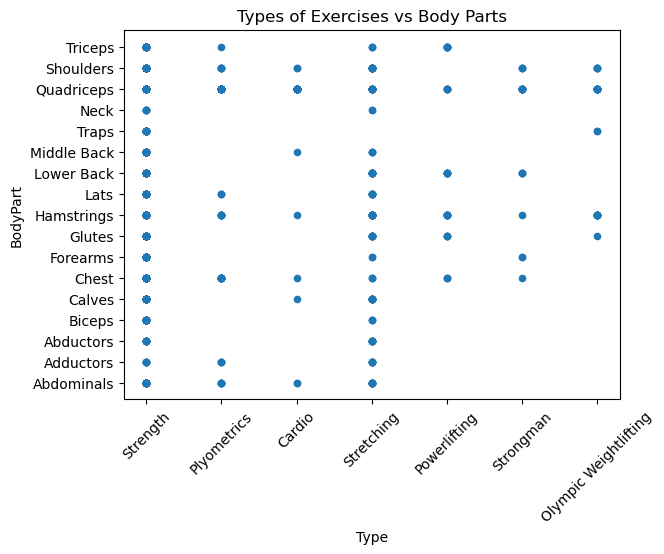

In [37]:
#Plotting type x body part scatter graph

fig = df.plot.scatter('Type', 'BodyPart', rot = 45, title = "Types of Exercises vs Body Parts")

Based on this visualization we can hipotesize that strengh and stretching exercises are the most comprehensive types, allowing to work on most body parts.

Moving forward, we are going to have a look if certain types of exercise are more prone to equipment utilisation.

In [38]:
#Separate the exercises withouot equipment

bodyOnly = df[df.Equipment == 'Body Only']

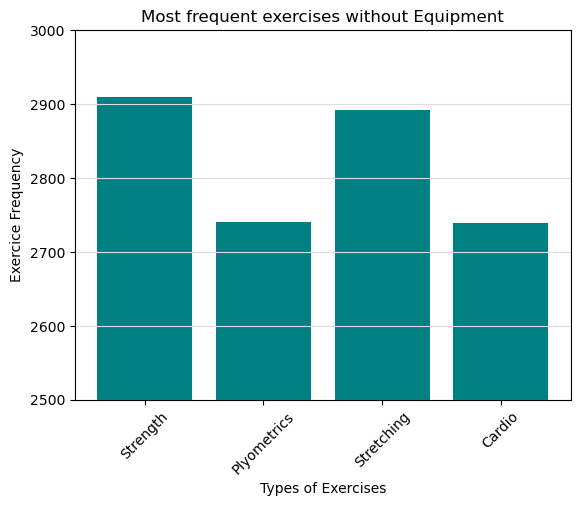

In [177]:
#Plot the graph to analyse with type of exercise is most representative of body only equipment

fig2, ax = plt.subplots()

ax.bar(bodyOnly.Type, bodyOnly.Index, color = 'teal')

ax.set_title('Most frequent exercises without Equipment')
ax.set_ylabel('Exercice Frequency')
ax.set_xlabel('Types of Exercises')
plt.xticks(rotation=45, ha='center')
plt.grid(color = '#dddddd', axis = 'y')
plt.ylim((2500, 3000))

plt.show()

Of all the body only exercises, **Strength** and **Stretching** seems to be the most frequent in comparison to Plyometrics and Cardio. Clearly Powerlifting, Olympic Weightlifting and Strongman are categories that requires some equipment by definition.

Next, to complete our type of exercise analysis, the focus will be on the level. Are cardio exercises the first choice for beginners ?

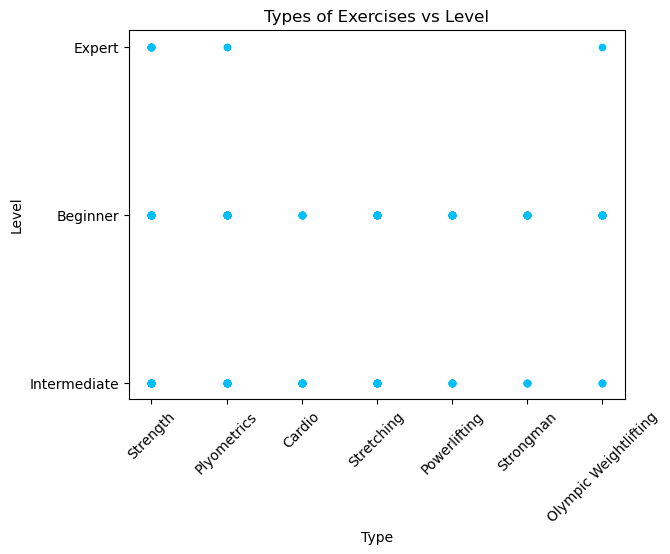

In [168]:
#Plotting type x level scatter graph

fig = df.plot.scatter('Type', 'Level', rot = 45, title = "Types of Exercises vs Level", color='deepskyblue')

If we break down the categories we will have a more refined and detailed analysis.

In [41]:
#slicing the df into different levels of fitness

beginner = df[df.Level == 'Beginner']
intermediate = df[df.Level == 'Intermediate']
expert = df[df.Level == 'Expert']

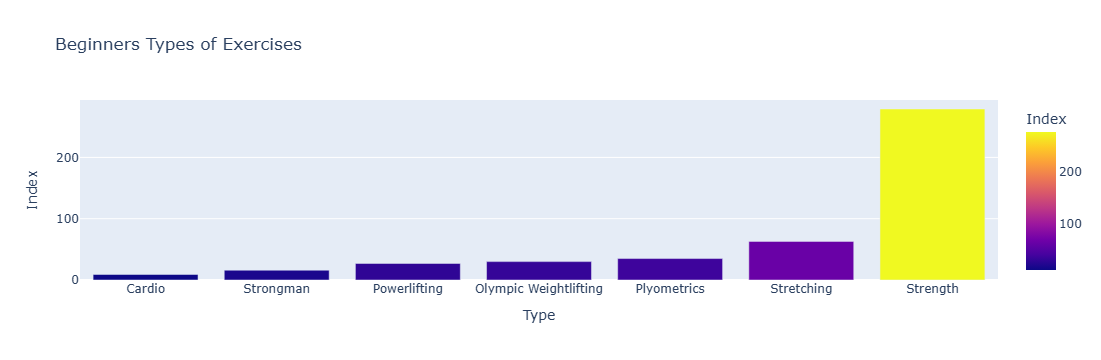

In [42]:
#group by type of exercise - beginners
beginner_type = beginner.groupby(['Type']).count()
beginner_type= beginner_type.sort_values(by='Index')
fig = px.bar(beginner_type, x=beginner_type.index, y='Index', color='Index', title='Beginners Types of Exercises')
fig.show()

Against all expectations, beginners will mostly choose to do strenght exercises followed by stretching and plyometrics. Cardio comes as the least favorite of all.

Intermediate level athletes have an even stronger preference for strenght exercises.

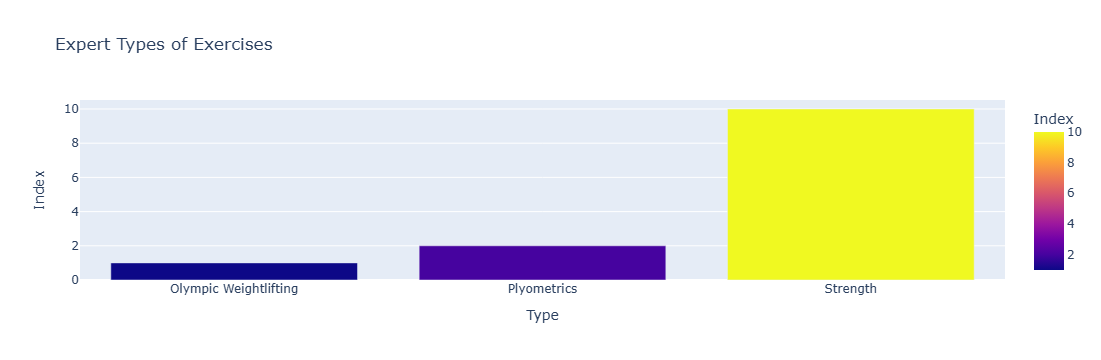

In [43]:
#group by type of exercise - intermediate
expert_type = expert.groupby(['Type']).count()
expert_type= expert_type.sort_values(by='Index')
fig = px.bar(expert_type, x=expert_type.index, y='Index', color='Index', title='Expert Types of Exercises')
fig.show()

Whereares expert level athletes concentrate exclusively in strenght, plyometrics and olympic weightlifting. They tend to specialize and don't disperse their energy doing other types of exercises.

### Body Part

For our next analysis we are going to take a look into the use of equipment to efficiently train certain body parts.

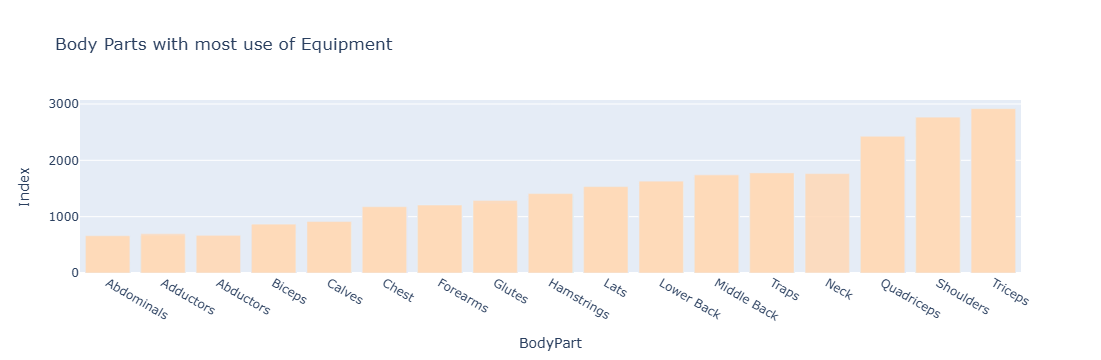

In [173]:
#Graph that shows which body part requires equipment
equipment =df[df.Equipment != 'Body Only']
fig = px.bar(equipment, x='BodyPart', y='Index', color_discrete_sequence =['peachpuff']*len(equipment), barmode='overlay', title='Body Parts with most use of Equipment')
fig.show()

As expected, abdominals are easy to train without equipment, as most big muscle groups and those used in home or outdoors workouts like calysthenics. However when focusing in very specific or small muscle groups equipment helps a lot and sometimes is the only way to target those muscles.

### Level

As seen before, the type of exercise slightly changed according to the level of fitness. To finish our study we shall take a look at the correlation of the level of fitness and the use of equipment along with the body part chosen.

#### Use of Equipment

In [52]:
#total of people by level
levels = df.groupby(['Level']).count()
levels

,Index,Title,Desc,Type,BodyPart,Equipment,Rating,RatingDesc
Level,,,,,,,,
Beginner,459,459,108,459,459,434,459,369
Expert,13,13,10,13,13,13,7,7
Intermediate,2446,2446,1250,2446,2446,2439,565,486


In [53]:
#only those with equipment
level_Equipment= equipment.groupby(['Level']).count()
level_Equipment

,Index,Title,Desc,Type,BodyPart,Equipment,Rating,RatingDesc
Level,,,,,,,,
Beginner,377,377,78,377,377,352,377,318
Expert,10,10,7,10,10,10,6,6
Intermediate,1453,1453,879,1453,1453,1446,379,342


In [60]:
#proportion of people that use equipment vs body weight only
proportions = (level_Equipment / levels) *100
proportions

,Index,Title,Desc,Type,BodyPart,Equipment,Rating,RatingDesc
Level,,,,,,,,
Beginner,82.135076,82.135076,72.222222,82.135076,82.135076,81.105991,82.135076,86.178862
Expert,76.923077,76.923077,70.000000,76.923077,76.923077,76.923077,85.714286,85.714286
Intermediate,59.403107,59.403107,70.320000,59.403107,59.403107,59.286593,67.079646,70.370370


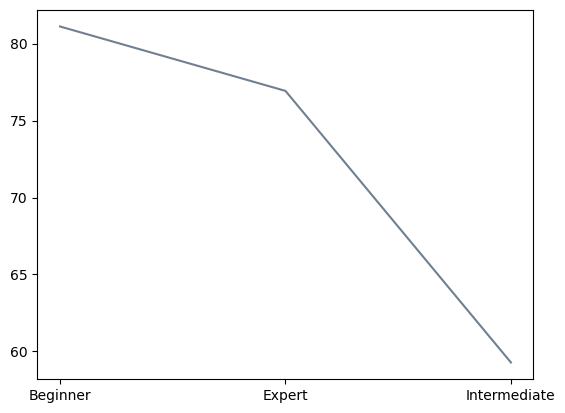

In [171]:
y= proportions.Equipment
fig = plt.plot(y, color='slategray')

From this graph we can deduct a correlation between the level of fitness and the use of equipment. Both beginners and expert will rely on the use of equipment, probably to get used to the sensations of the exercices and to learn form in the case of the beginners and to improve faster and / or gain more muscle mass in the case of the experts. Intermediates are confortable in the use of equipment and are autonomous to complete a workout without any equipment

#### Body Part

In [125]:
#counting the number of occurences of each body part
beginner_exerciseCount = beginner['BodyPart'].value_counts()
beginner_exerciseCount

BodyPart
Quadriceps     76
Chest          67
Hamstrings     58
Shoulders      47
Biceps         37
Abdominals     29
Triceps        24
Lower Back     20
Lats           19
Forearms       18
Calves         16
Middle Back    14
Glutes         13
Adductors       7
Neck            6
Traps           5
Abductors       3
Name: count, dtype: int64

<Axes: title={'center': 'Most worked body parts by beginners'}, xlabel='BodyPart'>

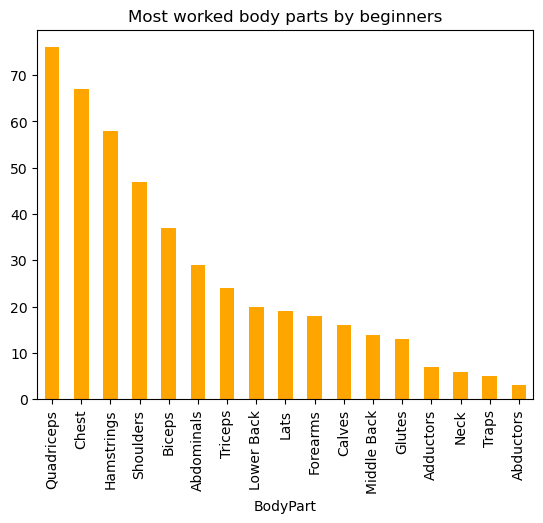

In [158]:
beginner_exerciseCount.plot(kind='bar', title= 'Most worked body parts by beginners', color='orange')

<Axes: title={'center': 'Most worked body parts by intermediates'}, xlabel='BodyPart'>

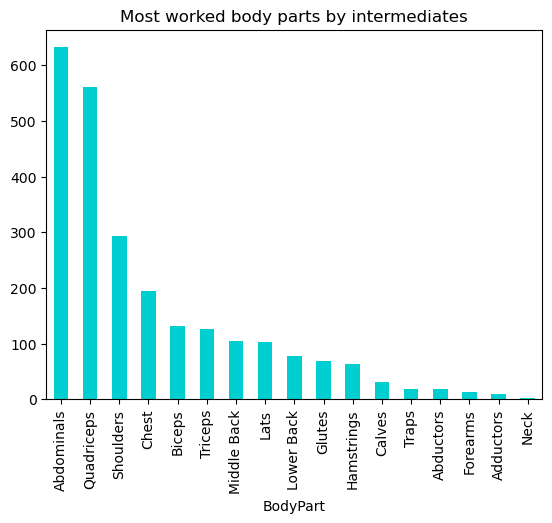

In [162]:
#counting the number of occurences of each body part
intermediate_exerciseCount = intermediate['BodyPart'].value_counts()
intermediate_exerciseCount.plot(kind='bar', title= 'Most worked body parts by intermediates', color='darkturquoise')

<Axes: title={'center': 'Most worked body parts by experts'}, xlabel='BodyPart'>

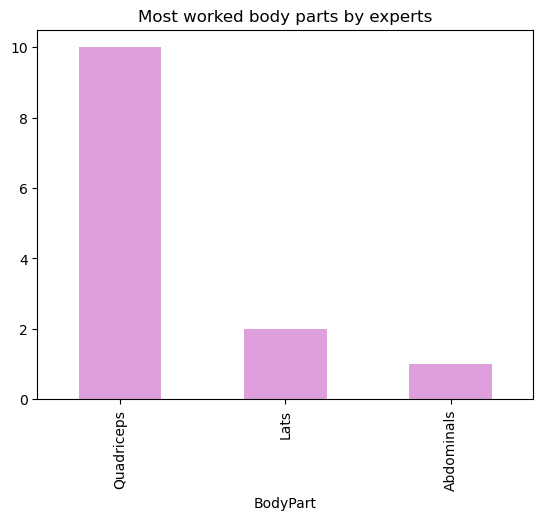

In [172]:
expert_exerciseCount = expert['BodyPart'].value_counts()
expert_exerciseCount.plot(kind='bar', title= 'Most worked body parts by experts', color='plum')

With exception of the glutes, we can notice that the big muscle grups are prioritized in all levels of fitness.

To conclude, we can find many correlations between the variables and infer the causes, keeping in mind that correlation does not equal causation.